# Handout 2: Unsupervised Learning (Problem 1)
#### Author: Miruna Andreea Gheata

In [44]:
import math
import random
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
import pandas as pd
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import homogeneity_completeness_v_measure

In [45]:
# Plots the data points of each class; if provided, it will also plot the decision boundary
def scatter_plot(X, y, title, xlabel, ylabel, num_points=60):
    plt.figure(1)
    plt.scatter(X[np.where(y == 0)[0]][:,0], X[np.where(y == 0)[0]][:,1], marker='+', color= '#FF4500', label='class 1')
    plt.scatter(X[np.where(y == 1)[0]][:,0], X[np.where(y == 1)[0]][:,1], marker='*', color= '#3CB371', label='class 2')
    plt.scatter(X[np.where(y == 2)[0]][:,0], X[np.where(y == 2)[0]][:,1], marker='.', color= '#90CAF9', label='class 3')  
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axis('equal')
    plt.legend()
    plt.title(title)
    plt.show(block=False)

In [3]:
def random_color():
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    return color

In [4]:
def show_clusters(X, y, labels, algorithm):
    for m in range(0, len(np.unique(labels))):
        plt.scatter(X[labels==m, 0], X[labels==m, 1], s=50, marker='o', c=np.array([random_color()]), label=f"Cluster {m}")
        plt.title(f"Clustering with {algorithm}-linkage algorithm\n({len(np.unique(labels))} clusters)")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
    plt.show()

In [5]:
def calculate_clusters(X, y, n_clusters, linkage):
    model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage=linkage)
    model.fit(X)
    model_labels = model.labels_
    show_clusters(X, y, model_labels, linkage)
    model_vmeasure = metrics.v_measure_score(y.reshape(y.shape[0]).tolist(), model_labels)
    model_davies_bouldin = davies_bouldin_score(X, model_labels)
    print(f"V-Measure: {model_vmeasure}")
    print(f"Davies-Bouldin score: {model_davies_bouldin}")
    return model_labels, model_vmeasure, model_davies_bouldin

# Data 1

In [9]:
group = '10'
ds = 1
data = np.loadtxt('datasets10/ds'+group+str(ds)+'.txt')
X = data[:, 0:2]
y = data[:, 2:3]

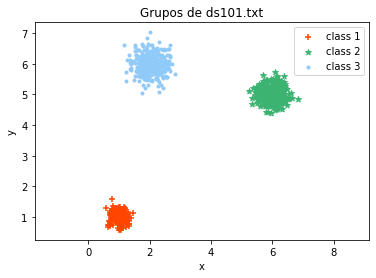

In [10]:
scatter_plot(X, y, "Grupos de ds101.txt", "x", "y")

In [11]:
clusters = [2, 3, 4, 5]
algorithms = ["single", "complete", "average", "ward"]

## Single-linkage

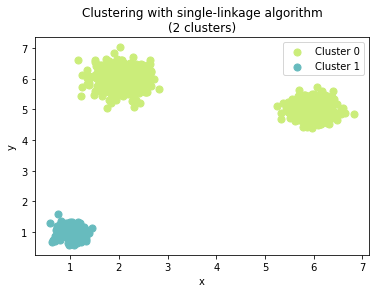

V-Measure: 0.7340172861308478
Davies-Bouldin score: 0.41907934605465863


In [12]:
model_single_2_labels, model_single_2_vmeasure, model_single_2_davies_bouldin = calculate_clusters(X, y, clusters[0], algorithms[0])

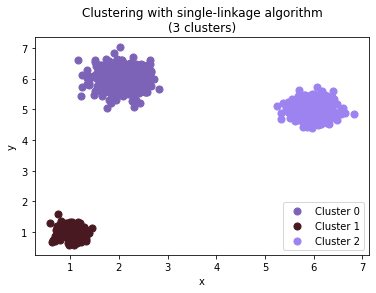

V-Measure: 1.0
Davies-Bouldin score: 0.15156697808053668


In [13]:
model_single_3_labels, model_single_3_vmeasure, model_single_3_davies_bouldin = calculate_clusters(X, y, clusters[1], algorithms[0])

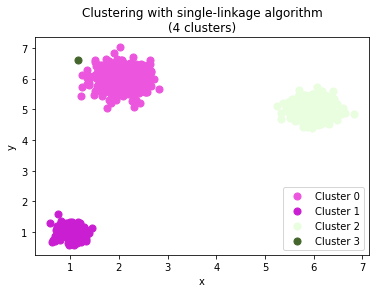

V-Measure: 0.9969117290146539
Davies-Bouldin score: 0.2621154058467507


In [14]:
model_single_4_labels, model_single_4_vmeasure, model_single_4_davies_bouldin = calculate_clusters(X, y, clusters[2], algorithms[0])

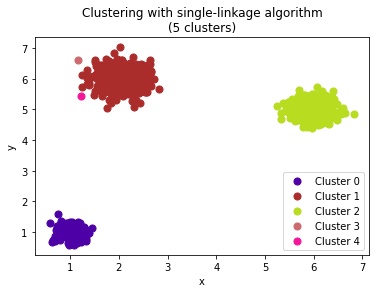

V-Measure: 0.9938438281550861
Davies-Bouldin score: 0.2969585290526567


In [15]:
model_single_5_labels, model_single_5_vmeasure, model_single_5_davies_bouldin = calculate_clusters(X, y, clusters[3], algorithms[0])

In [16]:
model_single_vmeasures = [model_single_2_vmeasure,
                          model_single_3_vmeasure,
                          model_single_4_vmeasure,
                          model_single_5_vmeasure]

model_single_davies_bouldin = [model_single_2_davies_bouldin,
                               model_single_3_davies_bouldin,
                               model_single_4_davies_bouldin,
                               model_single_5_davies_bouldin]

## Complete-linkage

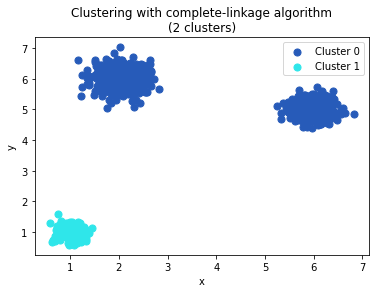

V-Measure: 0.7340172861308478
Davies-Bouldin score: 0.41907934605465863


In [17]:
model_complete_2_labels, model_complete_2_vmeasure, model_complete_2_davies_bouldin = calculate_clusters(X, y, clusters[0], algorithms[1])

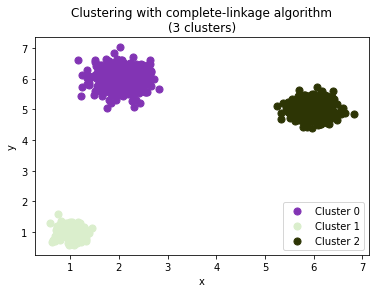

V-Measure: 1.0
Davies-Bouldin score: 0.15156697808053668


In [18]:
model_complete_3_labels, model_complete_3_vmeasure, model_complete_3_davies_bouldin = calculate_clusters(X, y, clusters[1], algorithms[1])

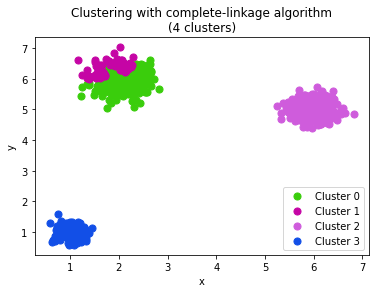

V-Measure: 0.9266781025539667
Davies-Bouldin score: 0.7353809498525187


In [19]:
model_complete_4_labels, model_complete_4_vmeasure, model_complete_4_davies_bouldin = calculate_clusters(X, y, clusters[2], algorithms[1])

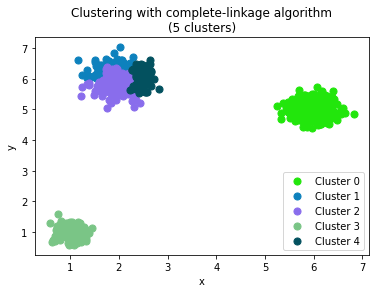

V-Measure: 0.8735361044165668
Davies-Bouldin score: 0.7566263293994333


In [20]:
model_complete_5_labels, model_complete_5_vmeasure, model_complete_5_davies_bouldin = calculate_clusters(X, y, clusters[3], algorithms[1])

In [21]:
model_complete_vmeasures = [model_complete_2_vmeasure,
                            model_complete_3_vmeasure,
                            model_complete_4_vmeasure,
                            model_complete_5_vmeasure]

model_complete_davies_bouldin = [model_complete_2_davies_bouldin,
                                 model_complete_3_davies_bouldin,
                                 model_complete_4_davies_bouldin,
                                 model_complete_5_davies_bouldin]

## Average linkage

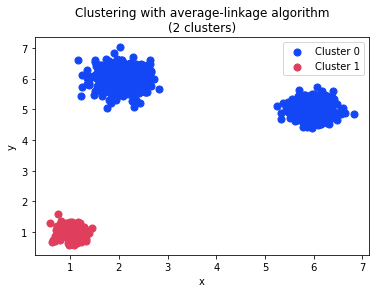

V-Measure: 0.7340172861308478
Davies-Bouldin score: 0.41907934605465863


In [22]:
model_average_2_labels, model_average_2_vmeasure, model_average_2_davies_bouldin = calculate_clusters(X, y, clusters[0], algorithms[2])

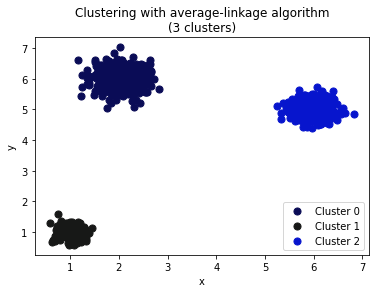

V-Measure: 1.0
Davies-Bouldin score: 0.15156697808053668


In [23]:
model_average_3_labels, model_average_3_vmeasure, model_average_3_davies_bouldin = calculate_clusters(X, y, clusters[1], algorithms[2])

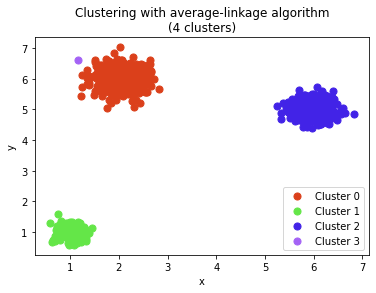

V-Measure: 0.9969117290146539
Davies-Bouldin score: 0.2621154058467507


In [24]:
model_average_4_labels, model_average_4_vmeasure, model_average_4_davies_bouldin = calculate_clusters(X, y, clusters[2], algorithms[2])

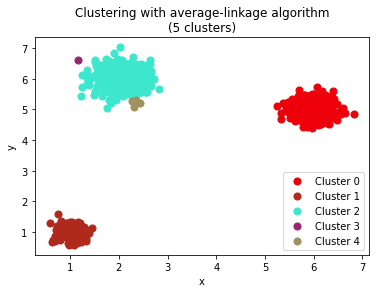

V-Measure: 0.987213883742774
Davies-Bouldin score: 0.3617344652425027


In [25]:
model_average_5_labels, model_average_5_vmeasure, model_average_5_davies_bouldin = calculate_clusters(X, y, clusters[3], algorithms[2])

In [26]:
model_average_vmeasures = [model_average_2_vmeasure,
                           model_average_3_vmeasure,
                           model_average_4_vmeasure,
                           model_average_5_vmeasure]

model_average_davies_bouldin = [model_average_2_davies_bouldin,
                                model_average_3_davies_bouldin,
                                model_average_4_davies_bouldin,
                                model_average_5_davies_bouldin]

## Ward linkage

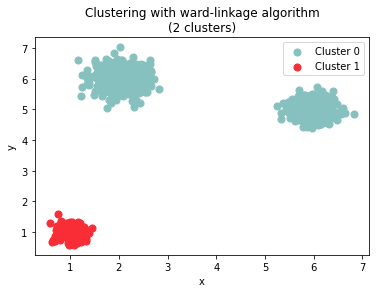

V-Measure: 0.7340172861308478
Davies-Bouldin score: 0.41907934605465863


In [27]:
model_ward_2_labels, model_ward_2_vmeasure, model_ward_2_davies_bouldin = calculate_clusters(X, y, clusters[0], algorithms[3])

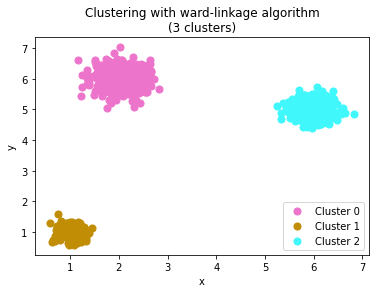

V-Measure: 1.0
Davies-Bouldin score: 0.15156697808053668


In [28]:
model_ward_3_labels, model_ward_3_vmeasure, model_ward_3_davies_bouldin = calculate_clusters(X, y, clusters[1], algorithms[3])

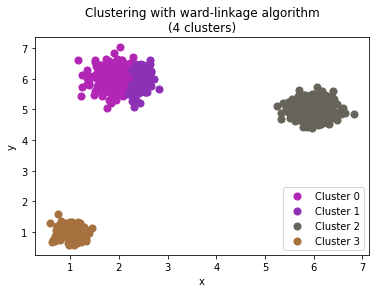

V-Measure: 0.9252013364680173
Davies-Bouldin score: 0.6480543681522039


In [29]:
model_ward_4_labels, model_ward_4_vmeasure, model_ward_4_davies_bouldin = calculate_clusters(X, y, clusters[2], algorithms[3])

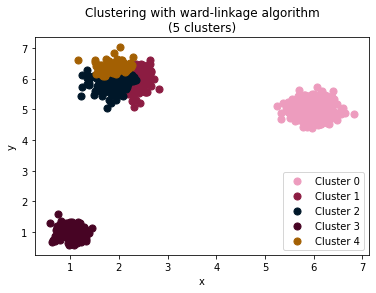

V-Measure: 0.8656011478166047
Davies-Bouldin score: 0.7085937696961049


In [30]:
model_ward_5_labels, model_ward_5_vmeasure, model_ward_5_davies_bouldin = calculate_clusters(X, y, clusters[3], algorithms[3])

In [31]:
model_ward_vmeasures = [model_ward_2_vmeasure,
                        model_ward_3_vmeasure,
                        model_ward_4_vmeasure,
                        model_ward_5_vmeasure]

model_ward_davies_bouldin = [model_ward_2_davies_bouldin,
                             model_ward_3_davies_bouldin,
                             model_ward_4_davies_bouldin,
                             model_ward_5_davies_bouldin]

In [32]:
model_vmeasures = [model_single_vmeasures, model_complete_vmeasures, model_average_vmeasures, model_ward_vmeasures]
model_davies_bouldin = [model_single_davies_bouldin,
                        model_complete_davies_bouldin,
                        model_average_davies_bouldin,
                        model_ward_davies_bouldin]

## Best number of clusters for each algorithm

In [33]:
data_best_clusters = [["Single-linkage", clusters[model_single_vmeasures.index(max(model_single_vmeasures))], clusters[model_single_davies_bouldin.index(min(model_single_davies_bouldin))]],
                      ["Complete-linkage", clusters[model_complete_vmeasures.index(max(model_complete_vmeasures))], clusters[model_complete_davies_bouldin.index(min(model_complete_davies_bouldin))]], 
                      ["Average-linkage", clusters[model_average_vmeasures.index(max(model_average_vmeasures))], clusters[model_average_davies_bouldin.index(min(model_average_davies_bouldin))]],
                      ["Ward", clusters[model_ward_vmeasures.index(max(model_ward_vmeasures))], clusters[model_ward_davies_bouldin.index(min(model_ward_davies_bouldin))]]]
df_best_clusters = pd.DataFrame(data_best_clusters, columns = ["Algorithm", "V-Measure", "Davies-Bouldin"])

In [34]:
dfStyler = df_best_clusters.style.set_properties(**{'text-align': 'center'})
dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

,Algorithm,V-Measure,Davies-Bouldin
0,Single-linkage,3,3
1,Complete-linkage,3,3
2,Average-linkage,3,3
3,Ward,3,3


## Best algorithm and number of clusters

### V-Measure

In [35]:
max_vmeasure = [max(model_single_vmeasures), max(model_complete_vmeasures), max(model_average_vmeasures), max(model_ward_vmeasures)]
max_vmeasure

[1.0, 1.0, 1.0, 1.0]

### Davies-Bouldin Score

In [36]:
min_davies_bouldin = [min(model_single_davies_bouldin), min(model_complete_davies_bouldin), min(model_average_davies_bouldin), min(model_ward_davies_bouldin)]
min_davies_bouldin

[0.15156697808053668,
 0.15156697808053668,
 0.15156697808053668,
 0.15156697808053668]

In [39]:
cm = contingency_matrix(y.reshape(y.shape[0]).tolist(), model_single_3_labels)
cm

array([[  0, 334,   0],
       [  0,   0, 333],
       [333,   0,   0]])

# Data 2

In [42]:
group = '10'
ds = 2
data_2 = np.loadtxt('datasets10/ds'+group+str(ds)+'.txt')
X_2 = data_2[:, 0:2]
y_2 = data_2[:, 2:3]

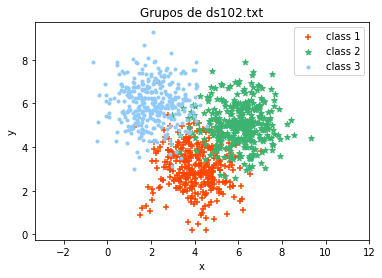

In [43]:
scatter_plot(X_2, y_2, "Grupos de ds102.txt", "x", "y")

## Single-linkage

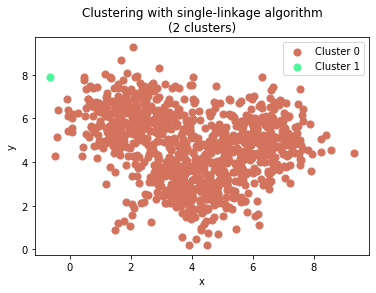

V-Measure: 0.0019893306531079003
Davies-Bouldin score: 0.40049020066084595


In [46]:
model_single_2_labels, model_single_2_vmeasure, model_single_2_davies_bouldin = calculate_clusters(X_2, y_2, clusters[0], algorithms[0])

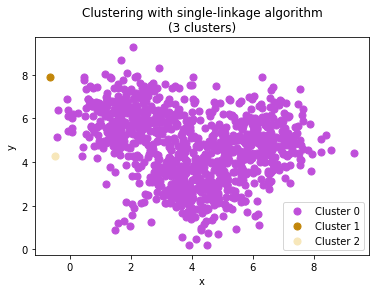

V-Measure: 0.0039540439393072925
Davies-Bouldin score: 0.46667193115907574


In [47]:
model_single_3_labels, model_single_3_vmeasure, model_single_3_davies_bouldin = calculate_clusters(X_2, y_2, clusters[1], algorithms[0])

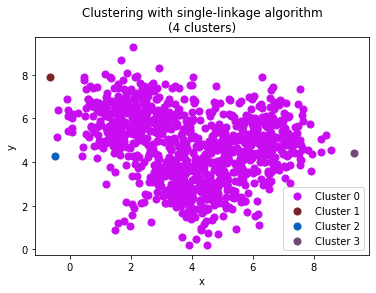

V-Measure: 0.005883928586455491
Davies-Bouldin score: 0.457484685594304


In [48]:
model_single_4_labels, model_single_4_vmeasure, model_single_4_davies_bouldin = calculate_clusters(X_2, y_2, clusters[2], algorithms[0])

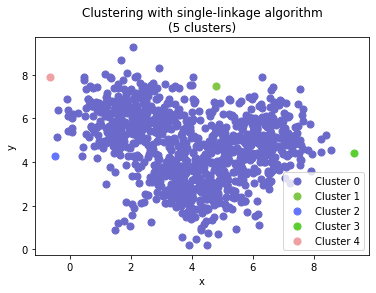

V-Measure: 0.007790378690050794
Davies-Bouldin score: 0.5772412694035991


In [50]:
model_single_5_labels, model_single_5_vmeasure, model_single_5_davies_bouldin = calculate_clusters(X_2, y_2, clusters[3], algorithms[0])

In [51]:
model_single_vmeasures = [model_single_2_vmeasure,
                          model_single_3_vmeasure,
                          model_single_4_vmeasure,
                          model_single_5_vmeasure]

model_single_davies_bouldin = [model_single_2_davies_bouldin,
                               model_single_3_davies_bouldin,
                               model_single_4_davies_bouldin,
                               model_single_5_davies_bouldin]

## Complete-linkage

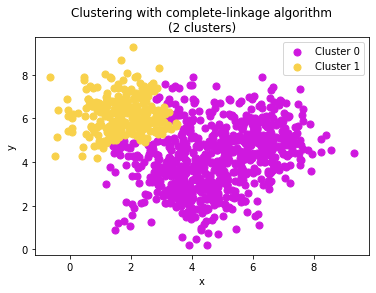

V-Measure: 0.41945872586038874
Davies-Bouldin score: 0.8000627894867816


In [52]:
model_complete_2_labels, model_complete_2_vmeasure, model_complete_2_davies_bouldin = calculate_clusters(X_2, y_2, clusters[0], algorithms[1])

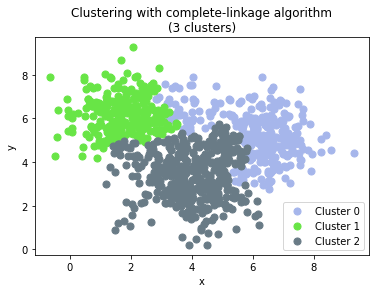

V-Measure: 0.5163337327548704
Davies-Bouldin score: 0.916260747579198


In [53]:
model_complete_3_labels, model_complete_3_vmeasure, model_complete_3_davies_bouldin = calculate_clusters(X_2, y_2, clusters[1], algorithms[1])

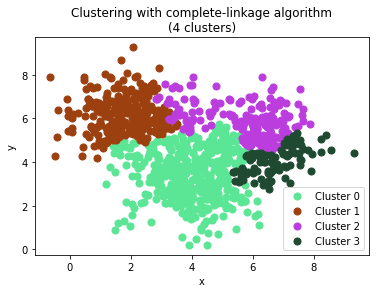

V-Measure: 0.5004201433006226
Davies-Bouldin score: 0.9436784939844054


In [54]:
model_complete_4_labels, model_complete_4_vmeasure, model_complete_4_davies_bouldin = calculate_clusters(X_2, y_2, clusters[2], algorithms[1])

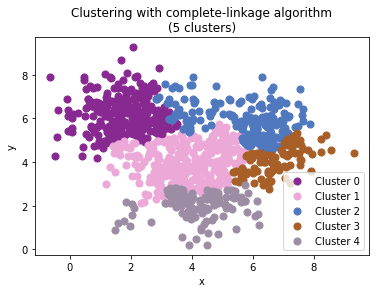

V-Measure: 0.47947792959873214
Davies-Bouldin score: 1.0272625471893735


In [55]:
model_complete_5_labels, model_complete_5_vmeasure, model_complete_5_davies_bouldin = calculate_clusters(X_2, y_2, clusters[3], algorithms[1])

In [56]:
model_complete_vmeasures = [model_complete_2_vmeasure,
                            model_complete_3_vmeasure,
                            model_complete_4_vmeasure,
                            model_complete_5_vmeasure]

model_complete_davies_bouldin = [model_complete_2_davies_bouldin,
                                 model_complete_3_davies_bouldin,
                                 model_complete_4_davies_bouldin,
                                 model_complete_5_davies_bouldin]

## Average linkage

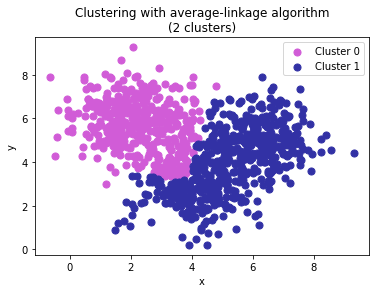

V-Measure: 0.48062248309657724
Davies-Bouldin score: 0.942854975042361


In [58]:
model_average_2_labels, model_average_2_vmeasure, model_average_2_davies_bouldin = calculate_clusters(X_2, y_2, clusters[0], algorithms[2])

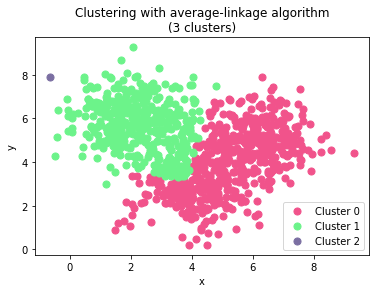

V-Measure: 0.4789975283747191
Davies-Bouldin score: 0.7581952788121882


In [59]:
model_average_3_labels, model_average_3_vmeasure, model_average_3_davies_bouldin = calculate_clusters(X_2, y_2, clusters[1], algorithms[2])

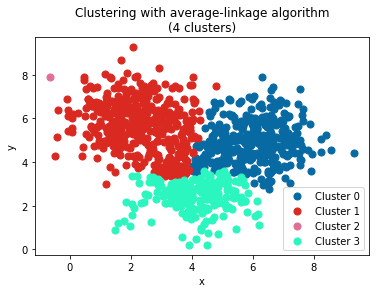

V-Measure: 0.5983718210744189
Davies-Bouldin score: 0.6388929033544526


In [60]:
model_average_4_labels, model_average_4_vmeasure, model_average_4_davies_bouldin = calculate_clusters(X_2, y_2, clusters[2], algorithms[2])

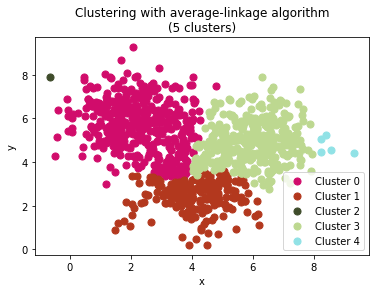

V-Measure: 0.5919020513679816
Davies-Bouldin score: 0.6378914206179349


In [62]:
model_average_5_labels, model_average_5_vmeasure, model_average_5_davies_bouldin = calculate_clusters(X_2, y_2, clusters[3], algorithms[2])

In [63]:
model_average_vmeasures = [model_average_2_vmeasure,
                           model_average_3_vmeasure,
                           model_average_4_vmeasure,
                           model_average_5_vmeasure]

model_average_davies_bouldin = [model_average_2_davies_bouldin,
                                model_average_3_davies_bouldin,
                                model_average_4_davies_bouldin,
                                model_average_5_davies_bouldin]

## Ward linkage

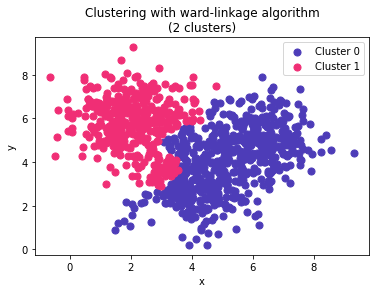

V-Measure: 0.47890288296452077
Davies-Bouldin score: 0.8950479110819423


In [64]:
model_ward_2_labels, model_ward_2_vmeasure, model_ward_2_davies_bouldin = calculate_clusters(X_2, y_2, clusters[0], algorithms[3])

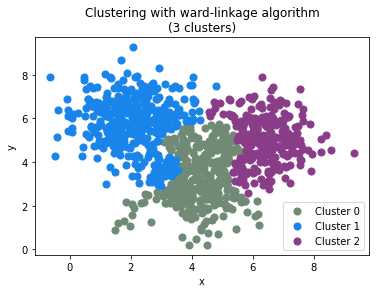

V-Measure: 0.5658339993891673
Davies-Bouldin score: 0.8731741968767136


In [65]:
model_ward_3_labels, model_ward_3_vmeasure, model_ward_3_davies_bouldin = calculate_clusters(X_2, y_2, clusters[1], algorithms[3])

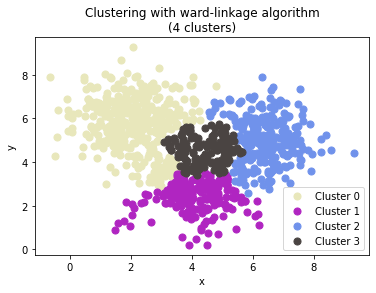

V-Measure: 0.5683271632783056
Davies-Bouldin score: 0.8906611987707955


In [66]:
model_ward_4_labels, model_ward_4_vmeasure, model_ward_4_davies_bouldin = calculate_clusters(X_2, y_2, clusters[2], algorithms[3])

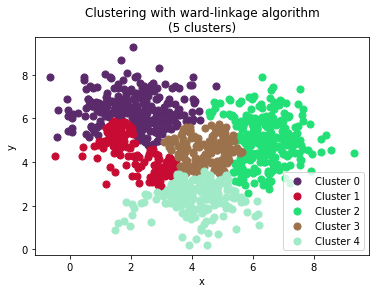

V-Measure: 0.5511749866400942
Davies-Bouldin score: 0.9940830243100187


In [67]:
model_ward_5_labels, model_ward_5_vmeasure, model_ward_5_davies_bouldin = calculate_clusters(X_2, y_2, clusters[3], algorithms[3])

In [68]:
model_ward_vmeasures = [model_ward_2_vmeasure,
                        model_ward_3_vmeasure,
                        model_ward_4_vmeasure,
                        model_ward_5_vmeasure]

model_ward_davies_bouldin = [model_ward_2_davies_bouldin,
                             model_ward_3_davies_bouldin,
                             model_ward_4_davies_bouldin,
                             model_ward_5_davies_bouldin]

In [69]:
model_vmeasures = [model_single_vmeasures, model_complete_vmeasures, model_average_vmeasures, model_ward_vmeasures]
model_davies_bouldin = [model_single_davies_bouldin,
                        model_complete_davies_bouldin,
                        model_average_davies_bouldin,
                        model_ward_davies_bouldin]

## Best number of clusters for each algorithm

In [70]:
data_best_clusters = [["Single-linkage", clusters[model_single_vmeasures.index(max(model_single_vmeasures))], clusters[model_single_davies_bouldin.index(min(model_single_davies_bouldin))]],
                      ["Complete-linkage", clusters[model_complete_vmeasures.index(max(model_complete_vmeasures))], clusters[model_complete_davies_bouldin.index(min(model_complete_davies_bouldin))]], 
                      ["Average-linkage", clusters[model_average_vmeasures.index(max(model_average_vmeasures))], clusters[model_average_davies_bouldin.index(min(model_average_davies_bouldin))]],
                      ["Ward", clusters[model_ward_vmeasures.index(max(model_ward_vmeasures))], clusters[model_ward_davies_bouldin.index(min(model_ward_davies_bouldin))]]]
df_best_clusters = pd.DataFrame(data_best_clusters, columns = ["Algorithm", "V-Measure", "Davies-Bouldin"])

In [71]:
dfStyler = df_best_clusters.style.set_properties(**{'text-align': 'center'})
dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

,Algorithm,V-Measure,Davies-Bouldin
0,Single-linkage,5,2
1,Complete-linkage,3,2
2,Average-linkage,4,5
3,Ward,4,3


## Best algorithm and number of clusters

### V-Measure

In [141]:
max_vmeasure = [max(model_single_vmeasures), max(model_complete_vmeasures), max(model_average_vmeasures), max(model_ward_vmeasures)]

best_algorithm = max_vmeasure.index(max(max_vmeasure))
best_cluster = model_vmeasures[best_algorithm].index(max(model_vmeasures[best_algorithm]))

print(f"The algorihtm that gives the best results is {algorithms[best_algorithm]} with {clusters[best_cluster]} clusters.")

The algorihtm that gives the best results is average with 4 clusters.


In [142]:
cm = contingency_matrix(y_2.reshape(y_2.shape[0]).tolist(), model_average_4_labels)
s = homogeneity_completeness_v_measure (y_2.reshape(y_2.shape[0]).tolist() , model_average_4_labels, beta=1.0)

In [143]:
cm

array([[ 54,  74,   0, 206],
       [312,  16,   0,   5],
       [  1, 330,   1,   1]])

In [144]:
s

(0.5900311185188911, 0.6069517138150028, 0.5983718210744189)

### Davies-Bouldin Score

In [145]:
min_davies_bouldin = [min(model_single_davies_bouldin), min(model_complete_davies_bouldin), min(model_average_davies_bouldin), min(model_ward_davies_bouldin)]
min_davies_bouldin

best_algorithm = min_davies_bouldin.index(min(min_davies_bouldin))
best_cluster = model_davies_bouldin[best_algorithm].index(min(model_davies_bouldin[best_algorithm]))

print(f"The algorihtm that gives the best results is {algorithms[best_algorithm]} with {clusters[best_cluster]} clusters.")

The algorihtm that gives the best results is single with 2 clusters.


In [146]:
cm = contingency_matrix(y_2.reshape(y_2.shape[0]).tolist(), model_single_2_labels)
s = homogeneity_completeness_v_measure (y_2.reshape(y_2.shape[0]).tolist() , model_single_2_labels, beta=1.0)

In [147]:
cm

array([[334,   0],
       [333,   0],
       [332,   1]])

In [148]:
s

(0.001001824430567441, 0.13919060576606782, 0.0019893306531079003)